In [8]:
import matplotlib.pyplot as plt

In [1]:
f = open('kaggle_visible_evaluation_triplets.txt')
lines = f.readlines()

In [2]:
def song_parser(data):
    local_dict = dict()
    for line in data:
        _, song, _ = line.strip().split('\t')
        if song in local_dict:
            local_dict[song] += 1
        else:
            local_dict[song] = 1
    return local_dict

In [3]:
song_to_count = song_parser(lines)

## Number of unique songs

In [10]:
len(song_to_count)

163206

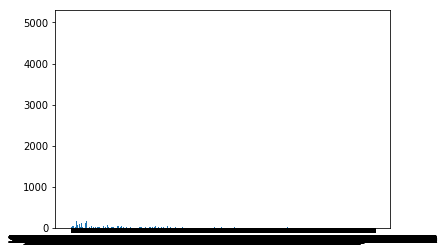

In [9]:
D = song_to_count

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))

plt.show()